# Proyecto Fase 1 del reto
**Código en python que despliega graficas para apreciar la calidad de aire en distintas ciudades.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/proyecto_estad/data_mediciones_todas_estaciones.csv')
df.head()

city  latitud  longitud       fecha parametro  hora  \
0  Aguascalientes     22.0    -102.5  2018-01-01      PM10     0   
1  Aguascalientes     22.0    -102.5  2018-01-01      PM10     1   
2  Aguascalientes     22.0    -102.5  2018-01-01      PM10     2   
3  Aguascalientes     22.0    -102.5  2018-01-01      PM10     3   
4  Aguascalientes     22.0    -102.5  2018-01-01      PM10     4   

   estacionesid           state  valororig  
0           303  Aguascalientes     76.969  
1           303  Aguascalientes    160.330  
2           303  Aguascalientes     65.862  
3           303  Aguascalientes     31.894  
4           303  Aguascalientes    112.440

In [ ]:
df['parametro'].unique()

array(['PM10'], dtype=object)

In [ ]:
df['city'].unique()

array(['Aguascalientes', 'Atitalaquia', 'Atotonilco', 'Celaya',
       'Chihuahua', 'Cuernavaca', 'Durango', 'Guadalajara',
       'Gómez Palacio', 'Huichapan', 'Irapuato', 'León', 'Monclova',
       'Monterrey', 'Nogales', 'Oaxaca', 'Pachuca', 'Piedras Negras',
       'Poza Rica', 'Puebla', 'Purísima del Rincón', 'Salamanca',
       'Saltillo', 'San Luis Potosí Estatal', 'Silao', 'Tepeji', 'Tepic',
       'Tizayuca', 'Tlaxcala', 'Toluca', 'Torreón', 'Tula', 'Tulancingo',
       'Valle de México', 'Xalapa', 'Tepeapulco', 'Minatitlán', 'Centro',
       'Colima'], dtype=object)

In [ ]:
df['state'].unique()

array(['Aguascalientes', 'Hidalgo', 'Guanajuato', 'Chihuahua -Estatal',
       'Chihuahua - Municipal', 'Morelos', 'Durango', 'Jalisco',
       'Coahuila', 'Nuevo León', 'Sonora', 'Oaxaca', 'Veracruz', 'Puebla',
       'San Luis Potosí', 'Nayarit', 'Tlaxcala', 'México',
       'Ciudad de México', 'Tabasco', 'Colima'], dtype=object)

In [ ]:
df['size']=abs(df['valororig']//10)

Definir el parametro

In [ ]:
pm10 = df[df['parametro']=='PM10']
pm10_dia = pm10.groupby(['fecha','city','state']).mean()

In [ ]:
pm10_dia = pm10_dia.drop(['validoorig','hora','estacionesid'],axis=1)

KeyError: ignored

In [ ]:
pm10_dia.reset_index(level=['fecha', 'city','state'],inplace=True)


In [ ]:
pm10_dia.head()

fecha            city               state    latitud    longitud  \
0  2018-01-01  Aguascalientes      Aguascalientes  22.000000 -102.500000   
1  2018-01-01     Atitalaquia             Hidalgo  20.059739  -99.213288   
2  2018-01-01      Atotonilco             Hidalgo  27.306838 -110.173654   
3  2018-01-01          Celaya          Guanajuato  20.521788 -100.814046   
4  2018-01-01       Chihuahua  Chihuahua -Estatal  28.500000 -106.000000   

        hora  estacionesid   valororig       size  
0  11.596639    196.168067   98.516888   9.462185  
1  12.000000     82.000000   40.693242   3.565217  
2  11.052632     83.000000   62.648117   5.789474  
3  12.607843     69.039216  106.456667  10.137255  
4  11.500000     53.000000   50.491667   4.458333

In [ ]:
ciudades = pm10_dia['city'].unique()

Ubicaciones geo

In [ ]:
from geopy.geocoders import Nominatim

In [ ]:
import time
geolocator = Nominatim(user_agent="reto_ma1001B")
latitud=[]
longitud=[]
city = []
state = []

for i in ciudades:
  try:
    location = geolocator.geocode(i)
    latitud.append(location.latitude)
    longitud.append(location.longitude)
    city.append(i)
    print(i)
    
    time.sleep(1)
    
  except:
    print("problem",i)

Aguascalientes
Atitalaquia
Atotonilco
Celaya
Chihuahua
Cuernavaca
Durango
Guadalajara
Gómez Palacio
Huichapan
Irapuato
León
Monclova
Monterrey
Nogales
Oaxaca
Pachuca
Piedras Negras
Poza Rica
Puebla
Purísima del Rincón
Salamanca
Saltillo
San Luis Potosí Estatal
Silao
Tepeji
Tepic
Tizayuca
Tlaxcala
Toluca
Torreón
Tula
Tulancingo
Valle de México
Xalapa
Tepeapulco
Minatitlán
Centro
Colima


In [ ]:
geo_coord = pd.DataFrame()
geo_coord['city']= city
geo_coord['latitud']=latitud
geo_coord['longitud']=longitud

In [ ]:
geo_coord['city']

0              Aguascalientes
1                 Atitalaquia
2                  Atotonilco
3                      Celaya
4                   Chihuahua
5                  Cuernavaca
6                     Durango
7                 Guadalajara
8               Gómez Palacio
9                   Huichapan
10                   Irapuato
11                       León
12                   Monclova
13                  Monterrey
14                    Nogales
15                     Oaxaca
16                    Pachuca
17             Piedras Negras
18                  Poza Rica
19                     Puebla
20        Purísima del Rincón
21                  Salamanca
22                   Saltillo
23    San Luis Potosí Estatal
24                      Silao
25                     Tepeji
26                      Tepic
27                   Tizayuca
28                   Tlaxcala
29                     Toluca
30                    Torreón
31                       Tula
32                 Tulancingo
33        

FILE NUEVO

In [ ]:
pm10_horas = geo_coord.merge(df[df['parametro']=='PM10'][['fecha',	'city','parametro',	'hora','estacionesid','state',	'valororig']],on='city')

In [ ]:
pm10_horas.head()

city  latitud  longitud       fecha parametro  hora  \
0  Aguascalientes     22.0    -102.5  2018-01-01      PM10     0   
1  Aguascalientes     22.0    -102.5  2018-01-01      PM10     1   
2  Aguascalientes     22.0    -102.5  2018-01-01      PM10     2   
3  Aguascalientes     22.0    -102.5  2018-01-01      PM10     3   
4  Aguascalientes     22.0    -102.5  2018-01-01      PM10     4   

   estacionesid           state  valororig  
0           303  Aguascalientes     76.969  
1           303  Aguascalientes    160.330  
2           303  Aguascalientes     65.862  
3           303  Aguascalientes     31.894  
4           303  Aguascalientes    112.440

In [ ]:
pm10_horas.to_csv('/content/drive/MyDrive/proyecto_estad/data_mediciones_todas_estaciones.csv',index=False)

# **Comparación entre 3 ciudades con los datos sin el promedio**
**No hemos considerado limpiar datos, aunque existen muchos valores que se salen de lo comun (que se salen del promedio) consideramos que sería interesante comparar estos picos con ciudades que no lo tienen**

Las tres ciudades que consideramos fueron de: 
Valle de México, Guadalajara y Monterrey.
Las tres ciudades más grandes

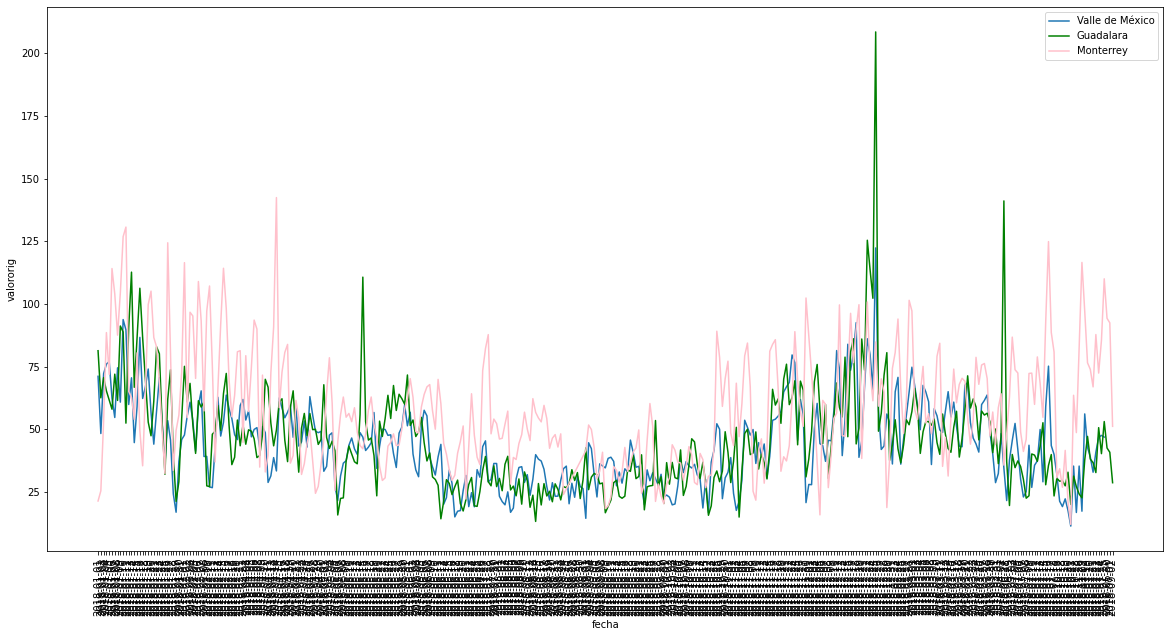

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=df[df['city']=='Valle de México'],x='fecha',y='valororig',label='Valle de México',ci=None)
sns.lineplot(data=df[df['city']=='Guadalajara'],x='fecha',y='valororig',color='green',label='Guadalara',ci=None)
sns.lineplot(data=df[df['city']=='Monterrey'],x='fecha',y='valororig',color='pink',label='Monterrey',ci=None)

plt.legend()
plt.xticks(rotation=90)
plt.show()

# Boxplots:
El uso de los boxplots por ciudad arroja datos que son complicados de apreciar pero con un vistazo en general de estos da una mayor claridad.

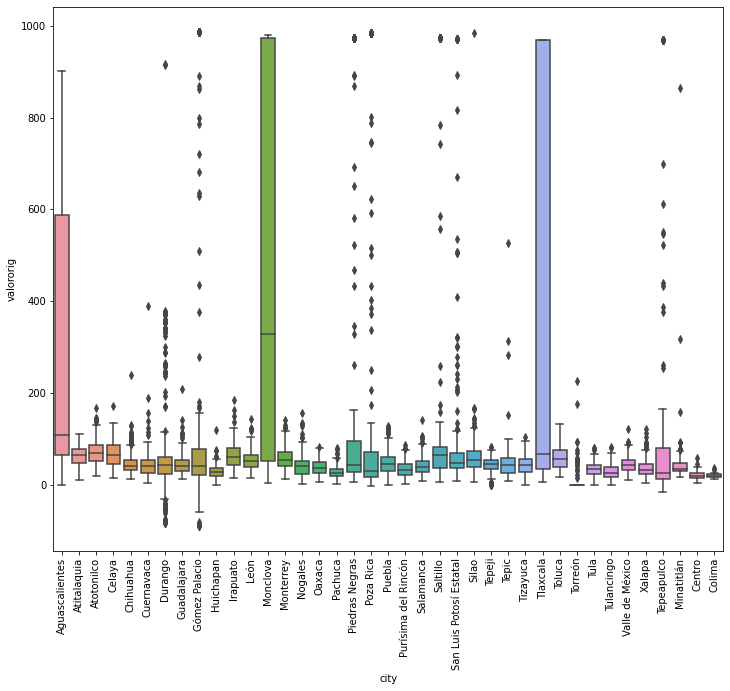

In [ ]:
fig,ax = plt.subplots(figsize=(12,10))
sns.boxplot(data=pm10_dia,x='city',y='valororig')
plt.xticks(rotation=90)
plt.show()

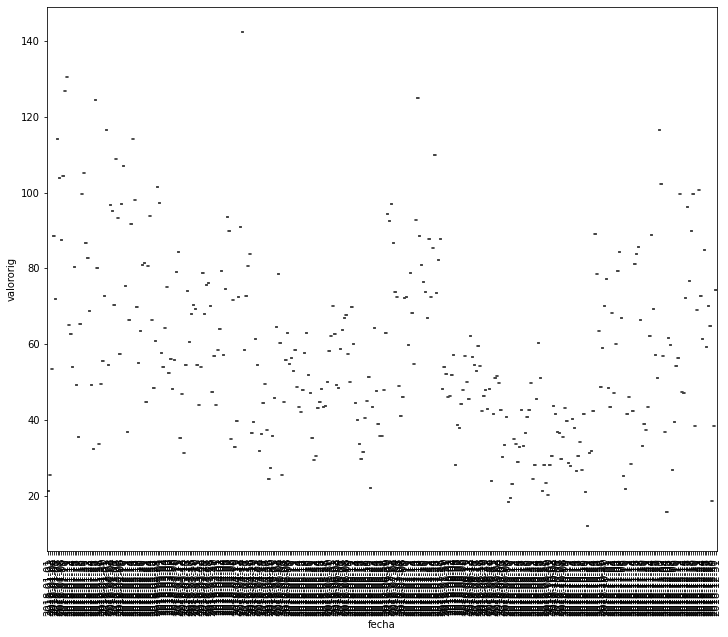

In [ ]:
fig,ax = plt.subplots(figsize=(12,10))
sns.boxplot(data=pm10_dia[pm10_dia['city']=='Monterrey'],x='fecha',y='valororig')
plt.xticks(rotation=90)
plt.show()

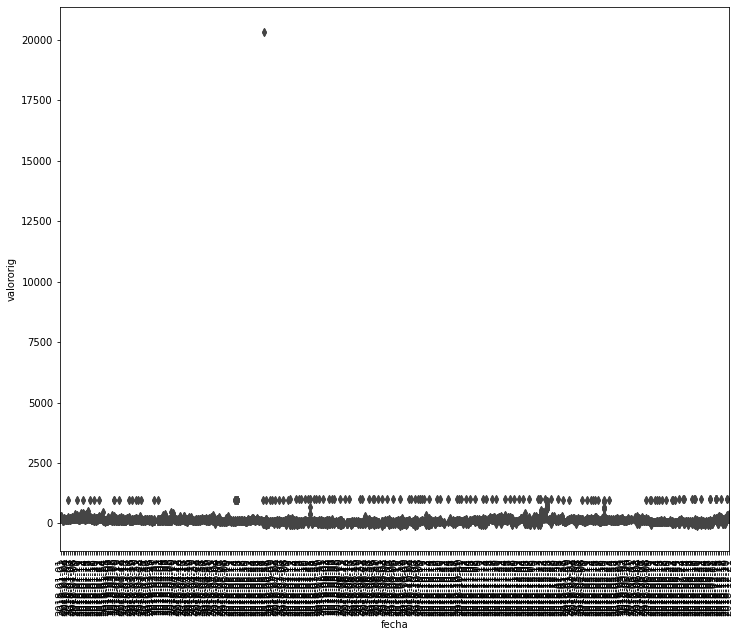

In [ ]:
fig,ax = plt.subplots(figsize=(12,10))
sns.boxplot(data=df[df['city']=='Guadalajara'],x='fecha',y='valororig')
plt.xticks(rotation=90)
plt.show()

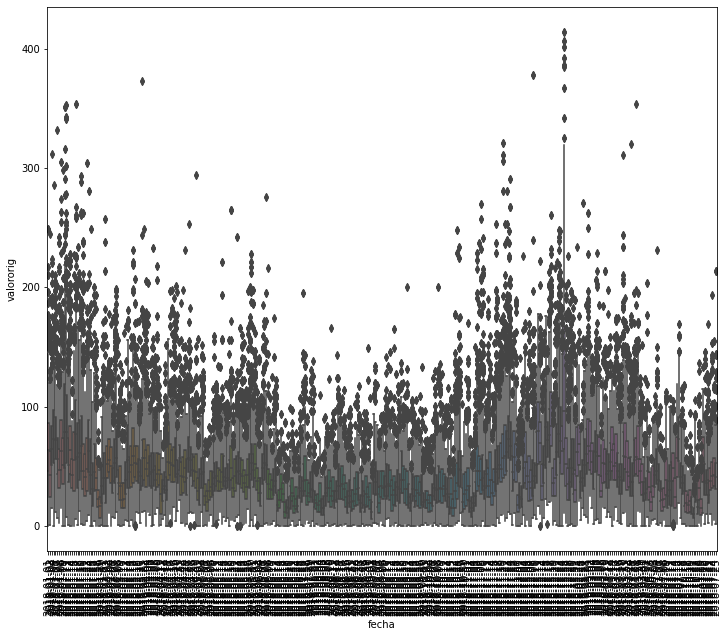

In [ ]:
fig,ax = plt.subplots(figsize=(12,10))
sns.boxplot(data=df[df['city']=='Valle de México'],x='fecha',y='valororig')
plt.xticks(rotation=90)
plt.show()

# Graficas lineales

**Usamos graficas lineales por ciudad para apreciar la calidad de aire.**


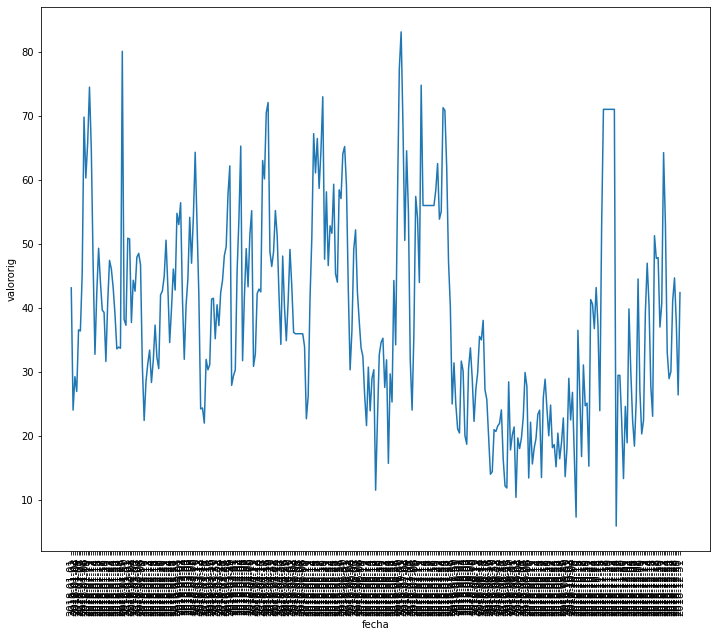

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
sns.lineplot(data=pm10_dia[pm10_dia['city']=='Oaxaca'],x='fecha',y='valororig')
plt.xticks(rotation=90)
plt.show()

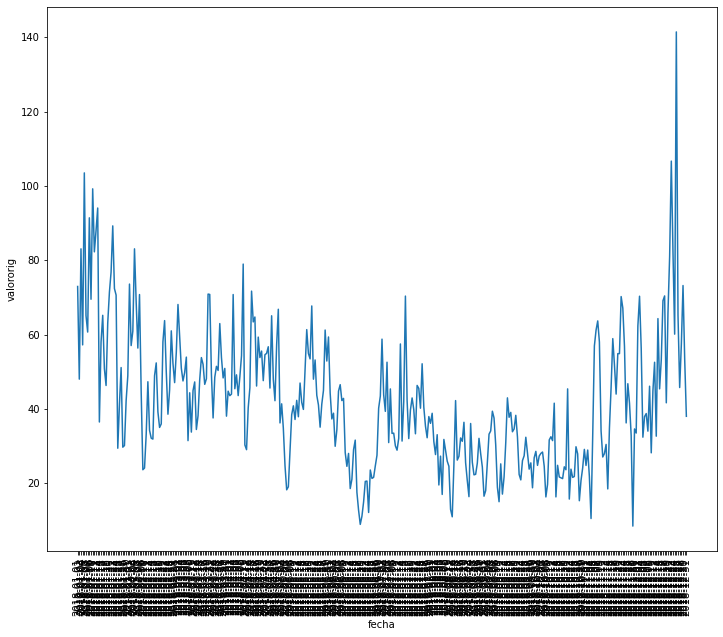

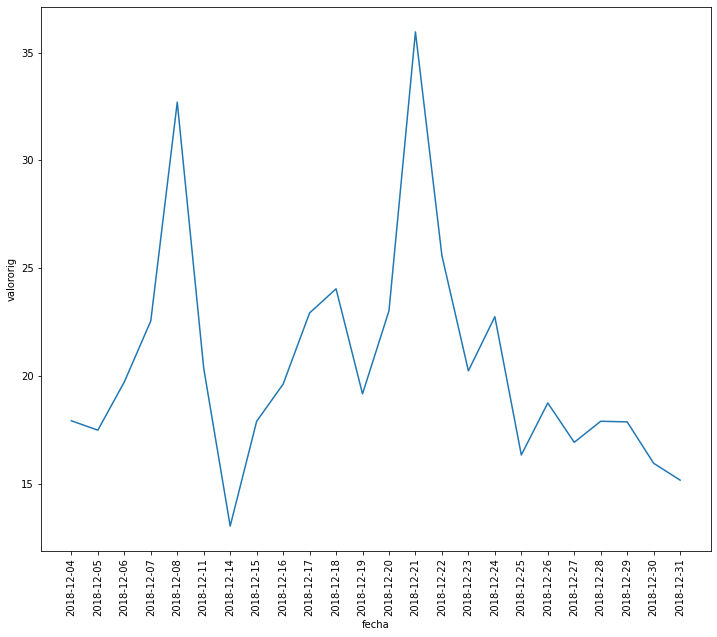

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
sns.lineplot(data=pm10_dia[pm10_dia['city']=='Colima'],x='fecha',y='valororig')
plt.xticks(rotation=90)
plt.show()

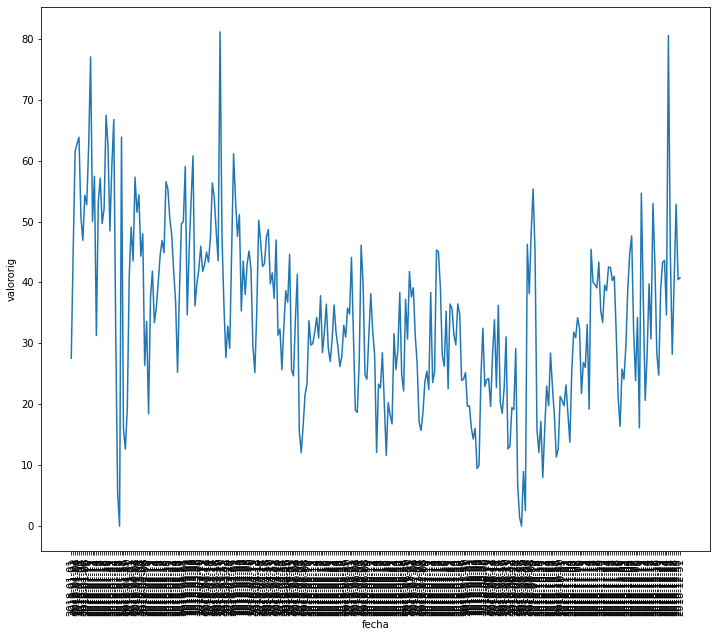

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
sns.lineplot(data=pm10_dia[pm10_dia['city']=='Tula'],x='fecha',y='valororig')
plt.xticks(rotation=90)
plt.show()

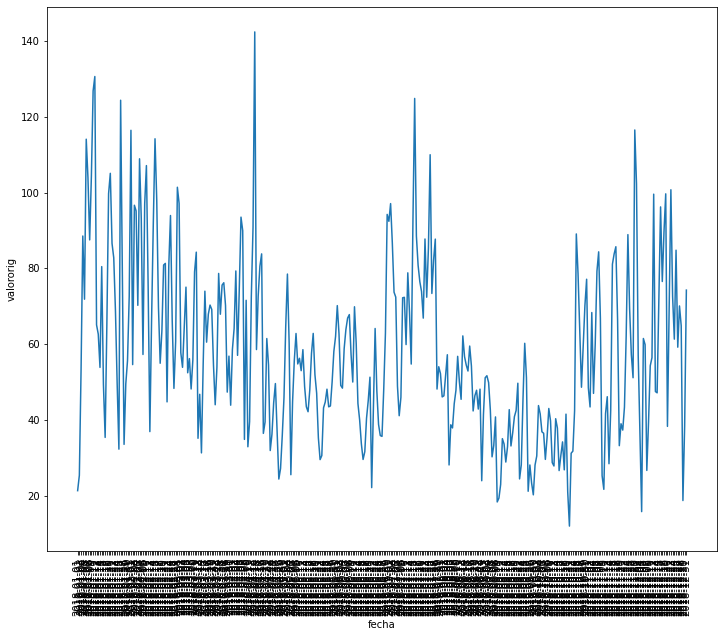

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
sns.lineplot(data=pm10_dia[pm10_dia['city']=='Monterrey'],x='fecha',y='valororig')
plt.xticks(rotation=90)
plt.show()

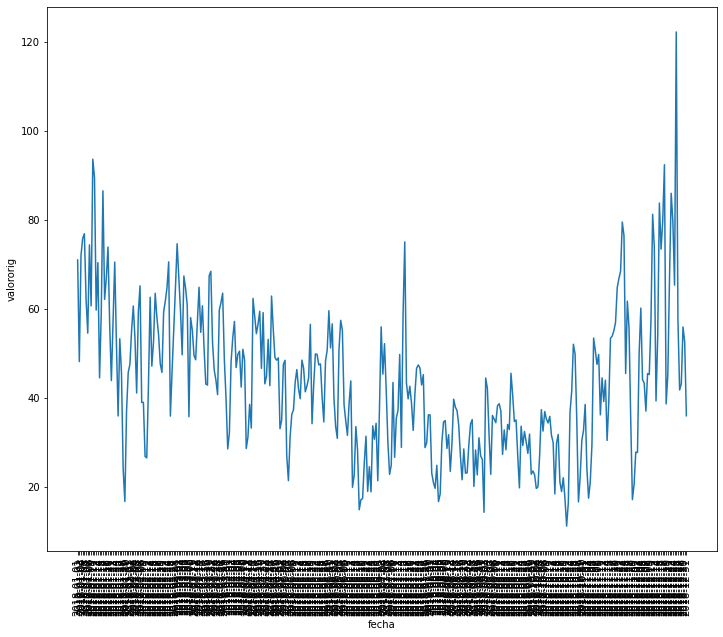

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
sns.lineplot(data=pm10_dia[pm10_dia['city']=='Valle de México'],x='fecha',y='valororig')
plt.xticks(rotation=90)
plt.show()

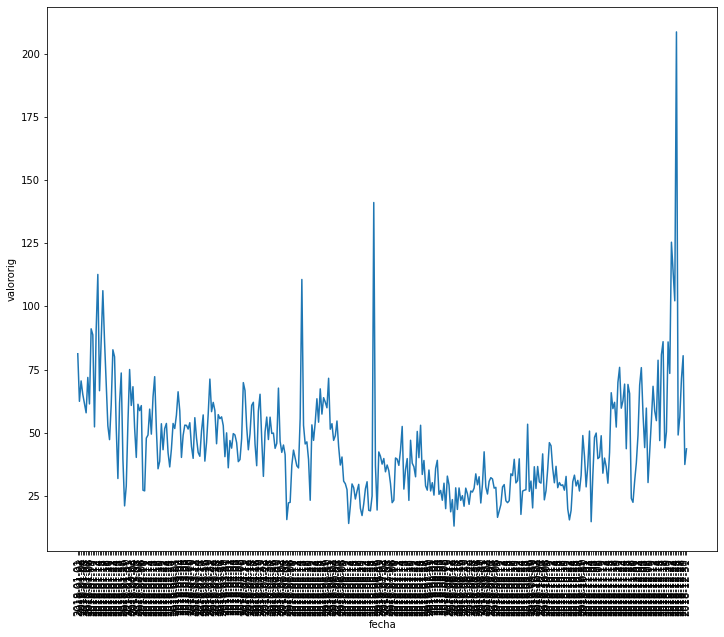

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
sns.lineplot(data=pm10_dia[pm10_dia['city']=='Guadalajara'],x='fecha',y='valororig')
plt.xticks(rotation=90)
plt.show()

**Informacion general del parametro por ciudad**

In [ ]:
df[df['city']=='Guadalajara']['valororig']

136360    89.539
136361    88.570
136362    71.739
136363    57.771
136364    61.509
           ...  
270065    19.488
270066    21.067
270067    29.655
270068    41.225
270069    51.402
Name: valororig, Length: 133710, dtype: float64

In [ ]:
df[df['city']=='Monterrey']['valororig']

346836    29.0
346837    44.0
346838    34.0
346839    12.0
346840     5.0
          ... 
516501    31.0
516502    39.0
516503    34.0
516504    31.0
516505    40.0
Name: valororig, Length: 169670, dtype: float64

In [ ]:
df[df['city']=='Valle de México']['valororig']

921635     125.0
921636      98.0
921637      88.0
921638      82.0
921639      96.0
           ...  
1214973     45.0
1214974     50.0
1214975     43.0
1214976     64.0
1214977     71.0
Name: valororig, Length: 293343, dtype: float64

# Nuevas graficas


In [ ]:
df.head()


city  latitud  longitud       fecha parametro  hora  \
0  Aguascalientes     22.0    -102.5  2018-01-01      PM10     0   
1  Aguascalientes     22.0    -102.5  2018-01-01      PM10     1   
2  Aguascalientes     22.0    -102.5  2018-01-01      PM10     2   
3  Aguascalientes     22.0    -102.5  2018-01-01      PM10     3   
4  Aguascalientes     22.0    -102.5  2018-01-01      PM10     4   

   estacionesid           state  valororig  size  
0           303  Aguascalientes     76.969   7.0  
1           303  Aguascalientes    160.330  16.0  
2           303  Aguascalientes     65.862   6.0  
3           303  Aguascalientes     31.894   3.0  
4           303  Aguascalientes    112.440  11.0

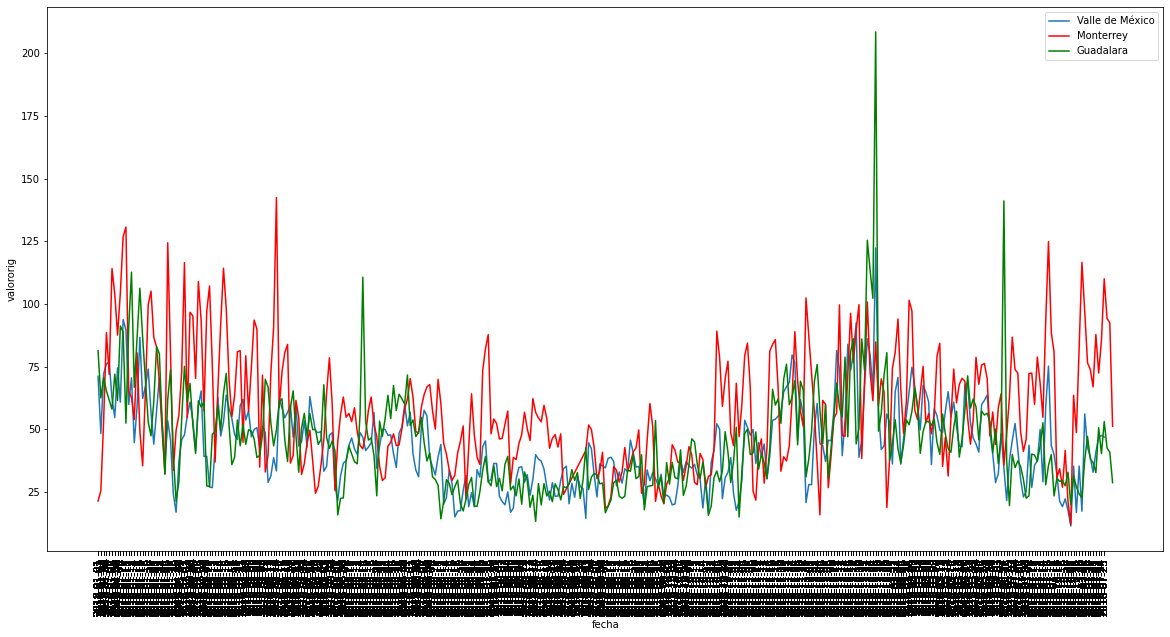

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=df[df['city']=='Valle de México'],x='fecha',y='valororig',label='Valle de México',ci=None)
sns.lineplot(data=df[df['city']=='Monterrey'],x='fecha',y='valororig',color='r',label='Monterrey',ci=None)
sns.lineplot(data=df[df['city']=='Guadalajara'],x='fecha',y='valororig',color='green',label='Guadalara',ci=None)
#sns.lineplot(data=df2[df2['city']=='Monterrey'],x='fecha',y='valororig',color='pink',label='Monterrey',ci=None)
plt.legend()
ax.set_xticks(df[df['city']=='Valle de México']['fecha'].values[::5])
ax.set_xticklabels(df[df['city']=='Valle de México']['fecha'].values[::5], rotation=90)
plt.show()

In [ ]:
df['fecha'] = pd.to_datetime(df['fecha'])
df["Día"] = df['fecha'].dt.day # the x-axis (freq)
df['Año']= df['fecha'].dt.year
#df['hour']= df['Formatted Date'].dt.hour
df['Mes']= df['fecha'].dt.month


In [ ]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Grafica por año ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax


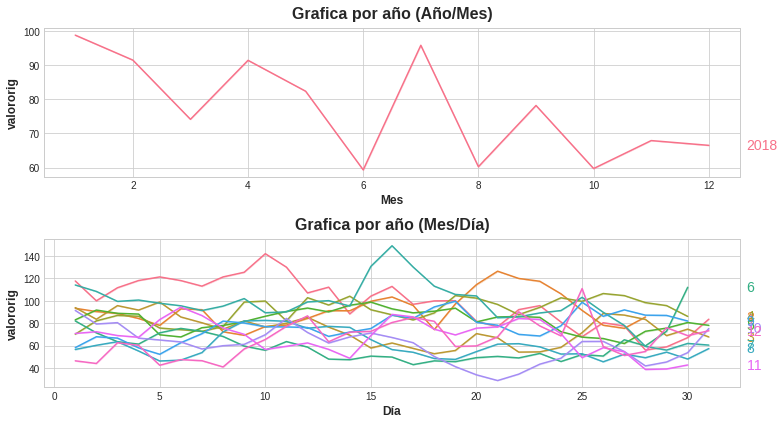

In [ ]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(11, 6))
seasonal_plot(df, y='valororig', period="Año", freq="Mes", ax=ax0)
seasonal_plot(df, y='valororig', period="Mes", freq="Día", ax=ax1)

# Comparación CDMX Monterrey


In [ ]:
import statsmodels.stats.api as sms
datos_mex = df[df['city']=='Valle de México']['valororig']
print(sms.DescrStatsW(datos_mex).tconfint_mean(0.05))

(44.5538860009614, 44.77592926649001)


In [ ]:
datos_mtr = df[df['city']=='Monterrey']['valororig']
print(sms.DescrStatsW(datos_mtr).tconfint_mean(0.05))

(57.993183948881864, 58.411136201999255)


In [ ]:
cm = sms.CompareMeans(sms.DescrStatsW(datos_mtr), sms.DescrStatsW(datos_mex))
print(cm.tconfint_diff(0.05,usevar='unequal'))

(13.300616417539985, 13.773888465889726)


CDMX tiene un promedio menor al de monterrey


# Comparación CDMX Guadalajara


In [ ]:
import statsmodels.stats.api as sms
datos_mex = df[df['city']=='Valle de México']['valororig']
print(sms.DescrStatsW(datos_mex).tconfint_mean(0.05))

(44.5538860009614, 44.77592926649001)


In [ ]:
datos_gdl = df[df['city']=='Guadalajara']['valororig']
print(sms.DescrStatsW(datos_gdl).tconfint_mean(0.05))

(45.46667958121598, 46.52463283394302)


In [ ]:
cm = sms.CompareMeans(sms.DescrStatsW(datos_gdl), sms.DescrStatsW(datos_mex))
print(cm.tconfint_diff(0.05,usevar='unequal'))

(0.7902471742131427, 1.8712499734944499)


El valor de la CDMX es menor al de Guadalajara

# Comparación CDMX y Tula


In [ ]:
import statsmodels.stats.api as sms
datos_mex = df[df['city']=='Valle de México']['valororig']
print(sms.DescrStatsW(datos_mex).tconfint_mean(0.05))

(44.5538860009614, 44.77592926649001)


In [ ]:
datos_tul = df[df['city']=='Tula']['valororig']
print(sms.DescrStatsW(datos_tul).tconfint_mean(0.05))

(33.829019839823445, 34.832480668184274)


In [ ]:
cm = sms.CompareMeans(sms.DescrStatsW(datos_tul), sms.DescrStatsW(datos_mex))
print(cm.tconfint_diff(0.05,usevar='unequal'))

(-10.848020380976902, -9.820294378466787)


# Comparación CDMX OAXACA


In [ ]:
import statsmodels.stats.api as sms
datos_mex = df[df['city']=='Valle de México']['valororig']
print(sms.DescrStatsW(datos_mex).tconfint_mean(0.05))

(44.5538860009614, 44.77592926649001)


In [ ]:
datos_oax = df[df['city']=='Oaxaca']['valororig']
print(sms.DescrStatsW(datos_oax).tconfint_mean(0.05))

NameError: ignored

In [ ]:
cm = sms.CompareMeans(sms.DescrStatsW(datos_oax), sms.DescrStatsW(datos_mex))
print(cm.tconfint_diff(0.05,usevar='unequal'))

NameError: ignored

Grafica comparacion cdmx oax y pueb

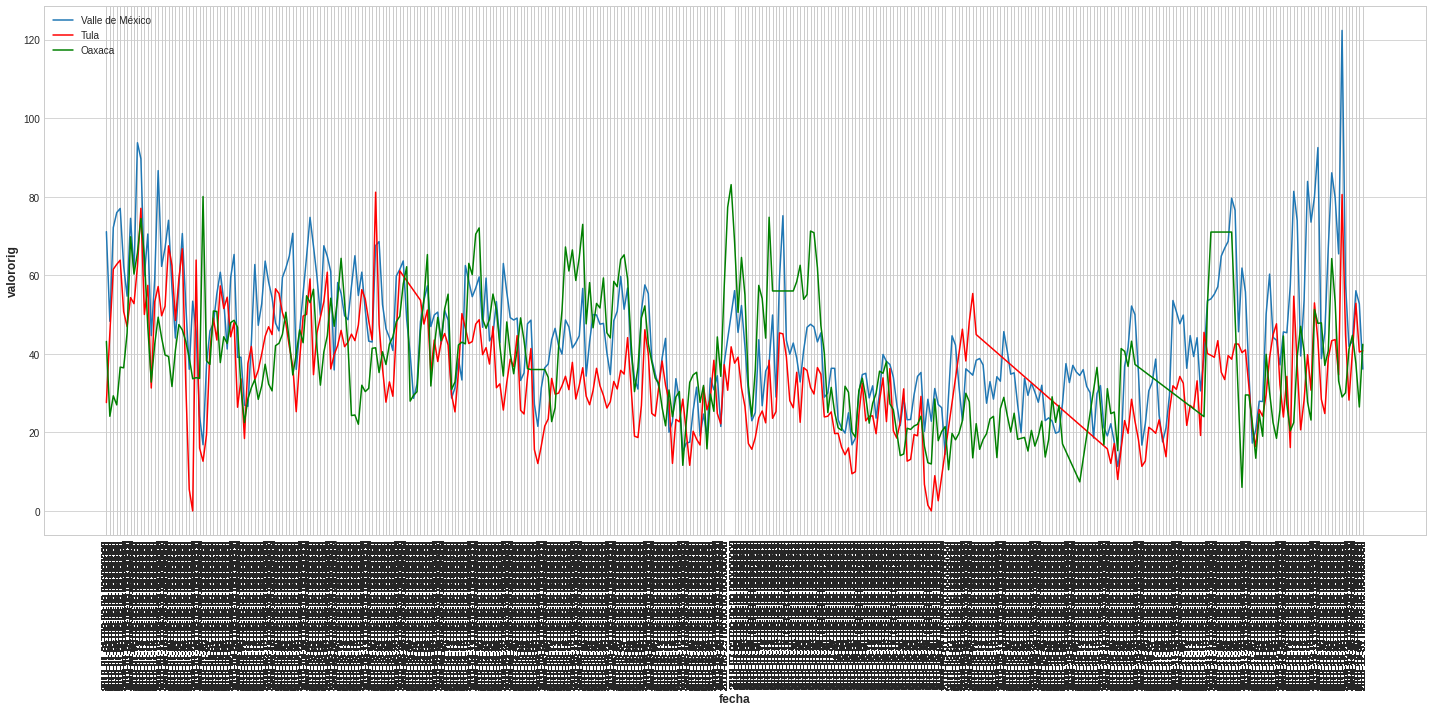

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=df[df['city']=='Valle de México'],x='fecha',y='valororig',label='Valle de México',ci=None)
sns.lineplot(data=df[df['city']=='Tula'],x='fecha',y='valororig',color='r',label='Tula',ci=None)
sns.lineplot(data=df[df['city']=='Oaxaca'],x='fecha',y='valororig',color='green',label='Oaxaca',ci=None)
#sns.lineplot(data=df2[df2['city']=='Monterrey'],x='fecha',y='valororig',color='pink',label='Monterrey',ci=None)
plt.legend()
ax.set_xticks(df[df['city']=='Valle de México']['fecha'].values[::5])
ax.set_xticklabels(df[df['city']=='Valle de México']['fecha'].values[::5], rotation=90)
plt.show()

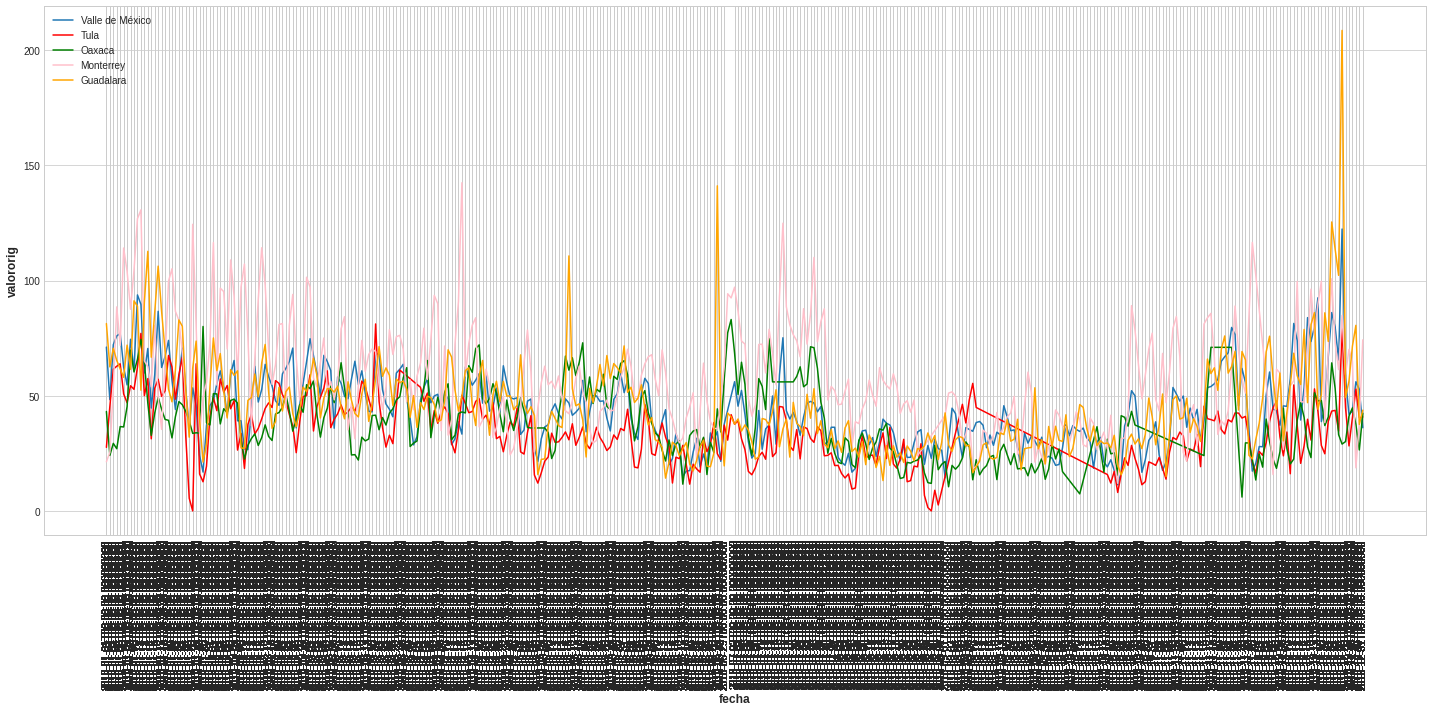

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=df[df['city']=='Valle de México'],x='fecha',y='valororig',label='Valle de México',ci=None)
sns.lineplot(data=df[df['city']=='Tula'],x='fecha',y='valororig',color='r',label='Tula',ci=None)
sns.lineplot(data=df[df['city']=='Oaxaca'],x='fecha',y='valororig',color='green',label='Oaxaca',ci=None)
sns.lineplot(data=df[df['city']=='Monterrey'],x='fecha',y='valororig',color='pink',label='Monterrey',ci=None)
sns.lineplot(data=df[df['city']=='Guadalajara'],x='fecha',y='valororig',color='orange',label='Guadalara',ci=None)
plt.legend()
ax.set_xticks(df[df['city']=='Valle de México']['fecha'].values[::5])
ax.set_xticklabels(df[df['city']=='Valle de México']['fecha'].values[::5], rotation=90)
plt.show()

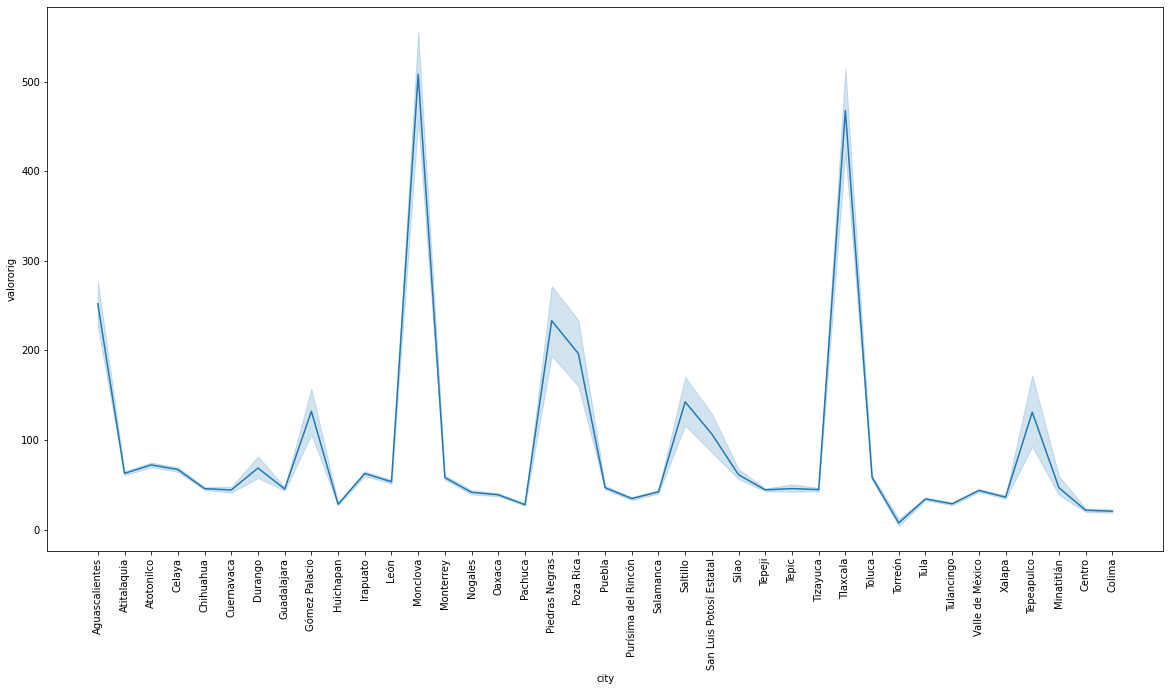

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=pm10_dia,x='city',y='valororig')
plt.xticks(rotation=90)
plt.show()

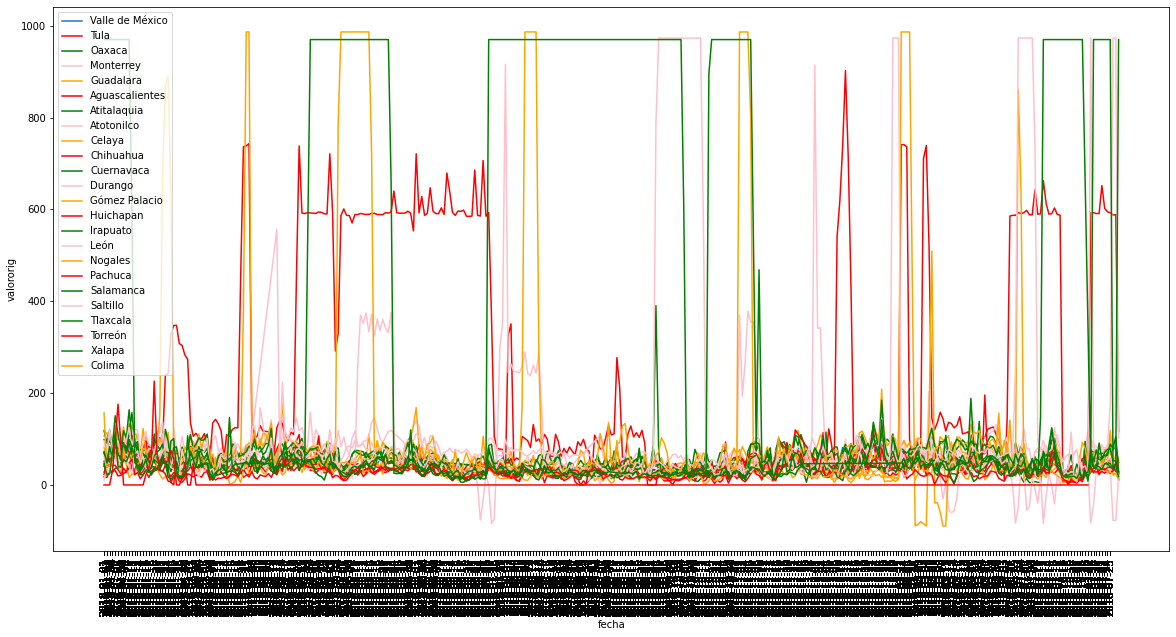

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=df[df['city']=='Valle de México'],x='fecha',y='valororig',label='Valle de México',ci=None)
sns.lineplot(data=df[df['city']=='Tula'],x='fecha',y='valororig',color='r',label='Tula',ci=None)
sns.lineplot(data=df[df['city']=='Oaxaca'],x='fecha',y='valororig',color='green',label='Oaxaca',ci=None)
sns.lineplot(data=df[df['city']=='Monterrey'],x='fecha',y='valororig',color='pink',label='Monterrey',ci=None)
sns.lineplot(data=df[df['city']=='Guadalajara'],x='fecha',y='valororig',color='orange',label='Guadalara',ci=None)
sns.lineplot(data=df[df['city']=='Aguascalientes'],x='fecha',y='valororig',color='r',label='Aguascalientes',ci=None)
sns.lineplot(data=df[df['city']=='Atitalaquia'],x='fecha',y='valororig',color='green',label='Atitalaquia',ci=None)
sns.lineplot(data=df[df['city']=='Atotonilco'],x='fecha',y='valororig',color='pink',label='Atotonilco',ci=None)
sns.lineplot(data=df[df['city']=='Celaya'],x='fecha',y='valororig',color='orange',label='Celaya',ci=None)
sns.lineplot(data=df[df['city']=='Chihuahua'],x='fecha',y='valororig',color='r',label='Chihuahua',ci=None)
sns.lineplot(data=df[df['city']=='Cuernavaca'],x='fecha',y='valororig',color='green',label='Cuernavaca',ci=None)
sns.lineplot(data=df[df['city']=='Durango'],x='fecha',y='valororig',color='pink',label='Durango',ci=None)
sns.lineplot(data=df[df['city']=='Gómez Palacio'],x='fecha',y='valororig',color='orange',label='Gómez Palacio',ci=None)
sns.lineplot(data=df[df['city']=='Huichapan'],x='fecha',y='valororig',color='r',label='Huichapan',ci=None)
sns.lineplot(data=df[df['city']=='Irapuato'],x='fecha',y='valororig',color='green',label='Irapuato',ci=None)
sns.lineplot(data=df[df['city']=='León'],x='fecha',y='valororig',color='pink',label='León',ci=None)
sns.lineplot(data=df[df['city']=='Nogales'],x='fecha',y='valororig',color='orange',label='Nogales',ci=None)
sns.lineplot(data=df[df['city']=='Pachuca'],x='fecha',y='valororig',color='r',label='Pachuca',ci=None)
sns.lineplot(data=df[df['city']=='Salamanca'],x='fecha',y='valororig',color='green',label='Salamanca',ci=None)
sns.lineplot(data=df[df['city']=='Saltillo'],x='fecha',y='valororig',color='pink',label='Saltillo',ci=None)
sns.lineplot(data=df[df['city']=='Tlaxcala'],x='fecha',y='valororig',color='green',label='Tlaxcala',ci=None)
sns.lineplot(data=df[df['city']=='Torreón'],x='fecha',y='valororig',color='r',label='Torreón',ci=None)
sns.lineplot(data=df[df['city']=='Xalapa'],x='fecha',y='valororig',color='green',label='Xalapa',ci=None)
sns.lineplot(data=df[df['city']=='Colima'],x='fecha',y='valororig',color='orange',label='Colima',ci=None)
plt.legend()
ax.set_xticks(df[df['city']=='Valle de México']['fecha'].values[::5])
ax.set_xticklabels(df[df['city']=='Valle de México']['fecha'].values[::5], rotation=90)
plt.show()